 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sbn
%matplotlib inline
# print with line break
pd.set_option('display.expand_frame_repr', False)

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace("$","").astype("float")
print(sp500_df.head())
sp500_df.dtypes

              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93


/Users/tjyang/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_df.pct_change()
daily_returns_sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
daily_returns_sp500.dropna(inplace=True)
daily_returns_sp500.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp500.columns = ['S&P 500']
daily_returns_sp500.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, daily_returns_sp500], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily returns for each portfolio'}, xlabel='Date'>

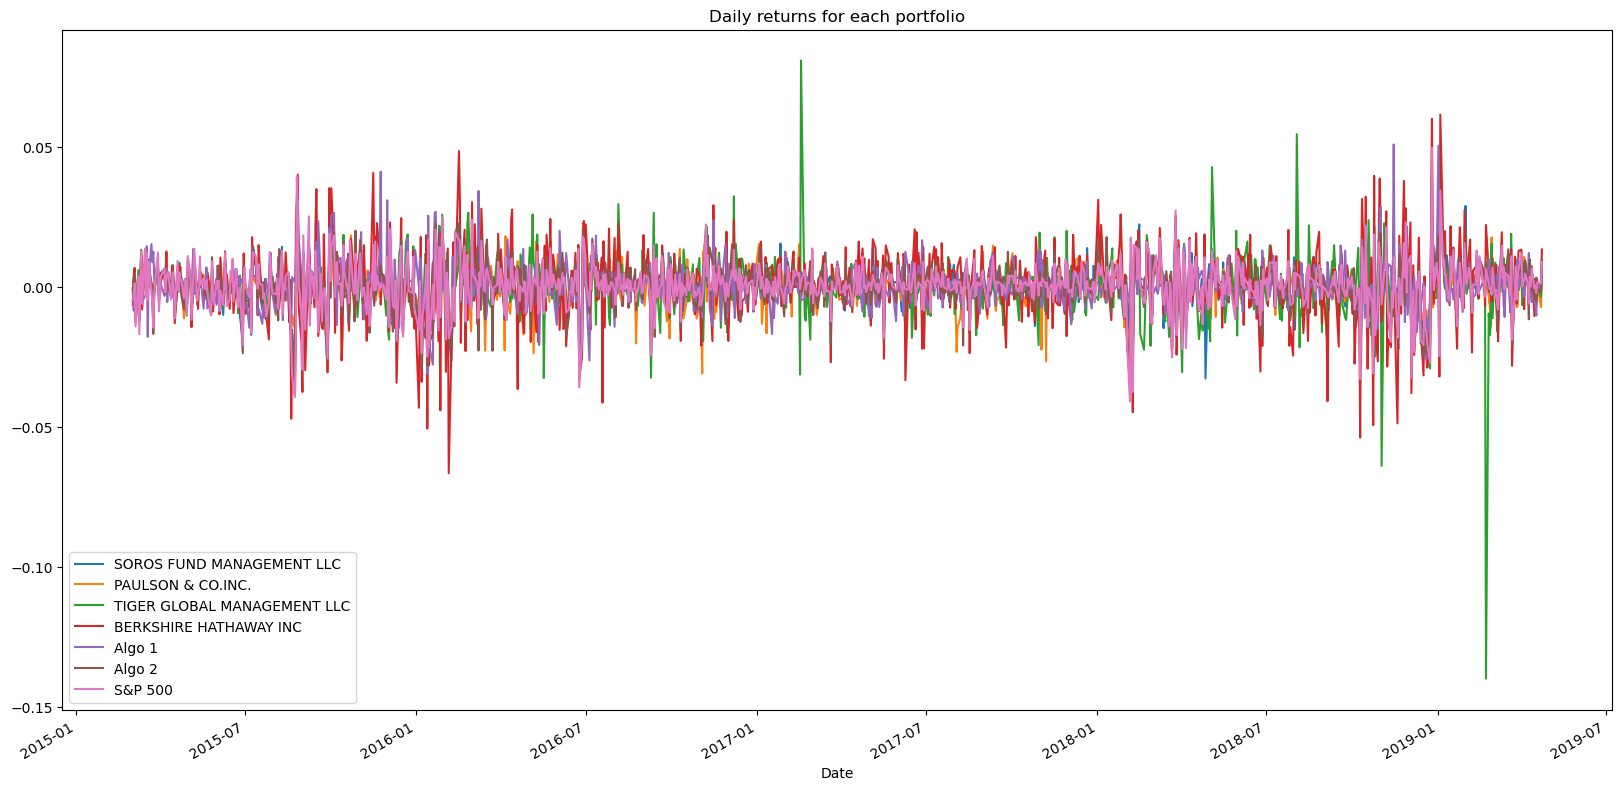

In [15]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title='Daily returns for each portfolio')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative returns of each portfolio'}, xlabel='Date'>

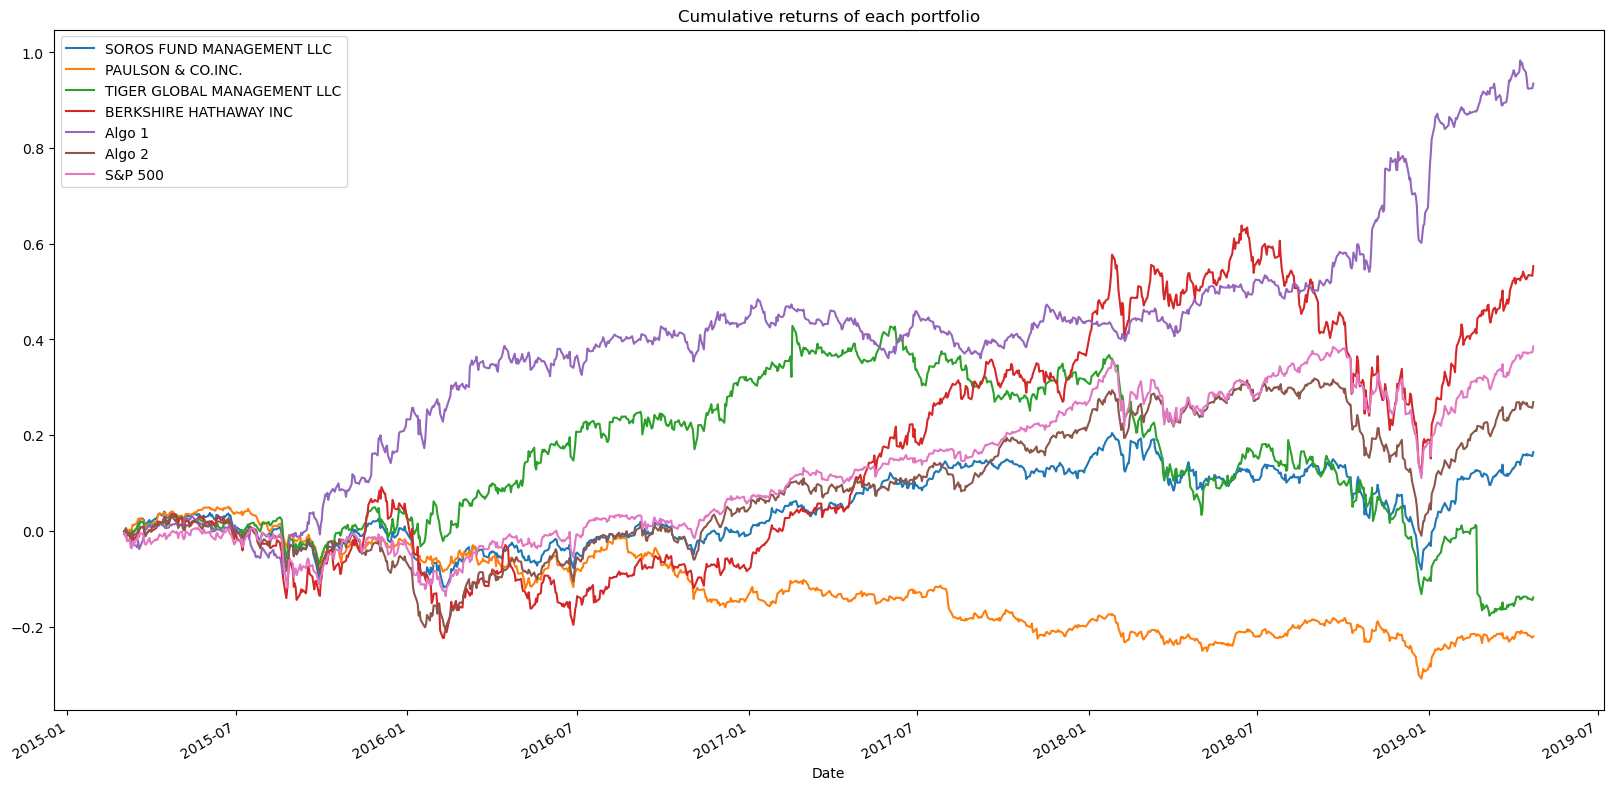

In [16]:
# Calculate cumulative returns of all portfolios
cumu_returns = (1 + combined_df).cumprod()-1
# Plot cumulative returns
cumu_returns.plot(figsize=(20,10), title='Cumulative returns of each portfolio')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


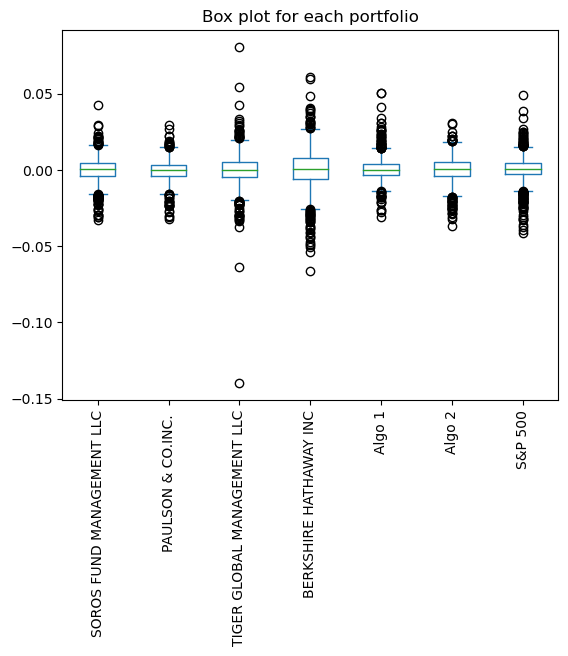

In [17]:
# Box plot to visually show risk
ax = combined_df.plot.box(title='Box plot for each portfolio')
ax.tick_params(axis='x', labelrotation=90)

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
print(f"Daily standard deviation of S&P 500 is {daily_std['S&P 500']}")
# Determine which portfolios are riskier than the S&P 500
for i, v in daily_std.items():
#    print('index: ', i, 'value: ', v)
    if i != 'S&P 500' and v > daily_std['S&P 500']:
        print(f"{i} is riskier than the S&P 500")

Daily standard deviation of S&P 500 is 0.008553731597758204
TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P 500
BERKSHIRE HATHAWAY INC is riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1    Algo 2   S&P 500
Date                                                                                                                                        
2015-03-03                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN
2015-03-04                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN
2015-03-05                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN
2015-03-06                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN
2015-03-09                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN
...          

<AxesSubplot:title={'center':'Rolling 21-day standard deviation'}, xlabel='Date'>

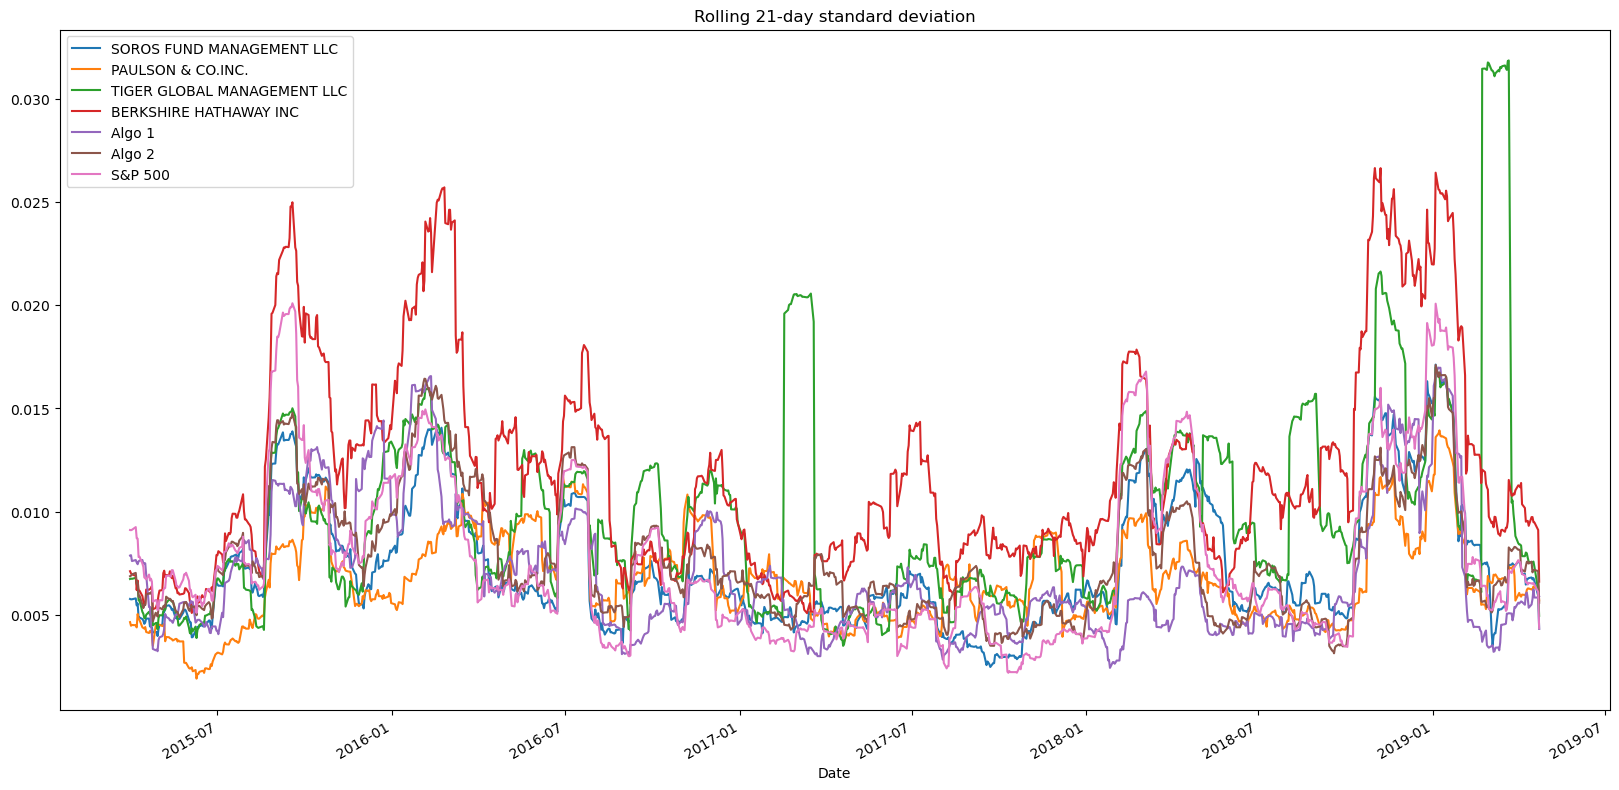

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = combined_df.rolling(window=21).std()
print(rolling_std_21)
# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(20,10), title='Rolling 21-day standard deviation')

### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1    Algo 2   S&P 500
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914                     0.561243                0.754360  0.321211  0.826873  0.837864
PAULSON & CO.INC.                             0.699914            1.000000                     0.434479                0.545623  0.268840  0.678152  0.669732
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479                     1.000000                0.424423  0.164387  0.507414  0.623946
BERKSHIRE HATHAWAY INC                        0.754360            0.545623                     0.424423                1.000000  0.292033  0.688082  0.751371
Algo 1                                        0.321211            0.268840                     0.164387                0.292033  1.000000  0.288243  0.279494
Algo 2                                        0.8268

<AxesSubplot:>

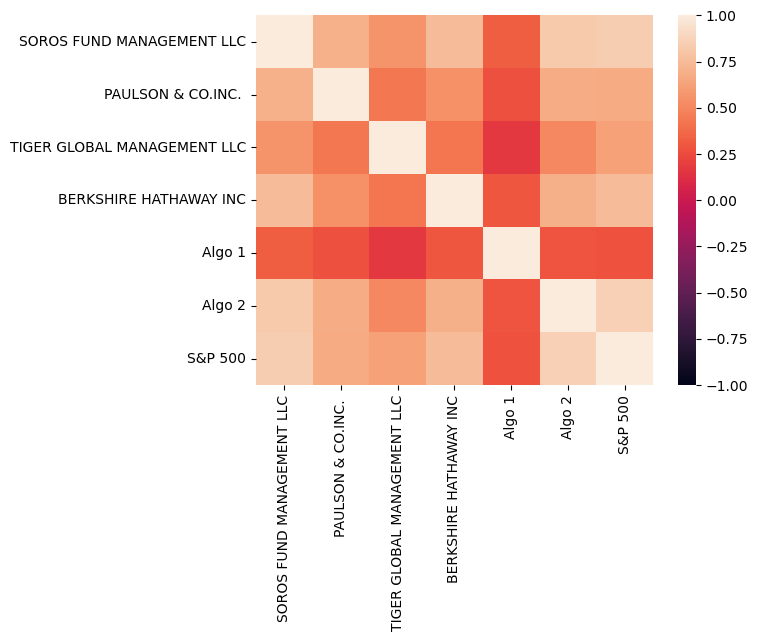

In [22]:
# Calculate the correlation
correlation = combined_df.corr()
print(correlation)
# Display de correlation matrix
sbn.heatmap(correlation, vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Covariance:
                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1    Algo 2   S&P 500
SOROS FUND MANAGEMENT LLC                     0.000062            0.000039                     0.000048                0.000077  0.000019  0.000054  0.000057
PAULSON & CO.INC.                             0.000039            0.000049                     0.000033                0.000050  0.000014  0.000040  0.000040
TIGER GLOBAL MANAGEMENT LLC                   0.000048            0.000033                     0.000119                0.000060  0.000014  0.000046  0.000058
BERKSHIRE HATHAWAY INC                        0.000077            0.000050                     0.000060                0.000167  0.000029  0.000074  0.000083
Algo 1                                        0.000019            0.000014                     0.000014                0.000029  0.000058  0.000018  0.000018
Algo 2                                  

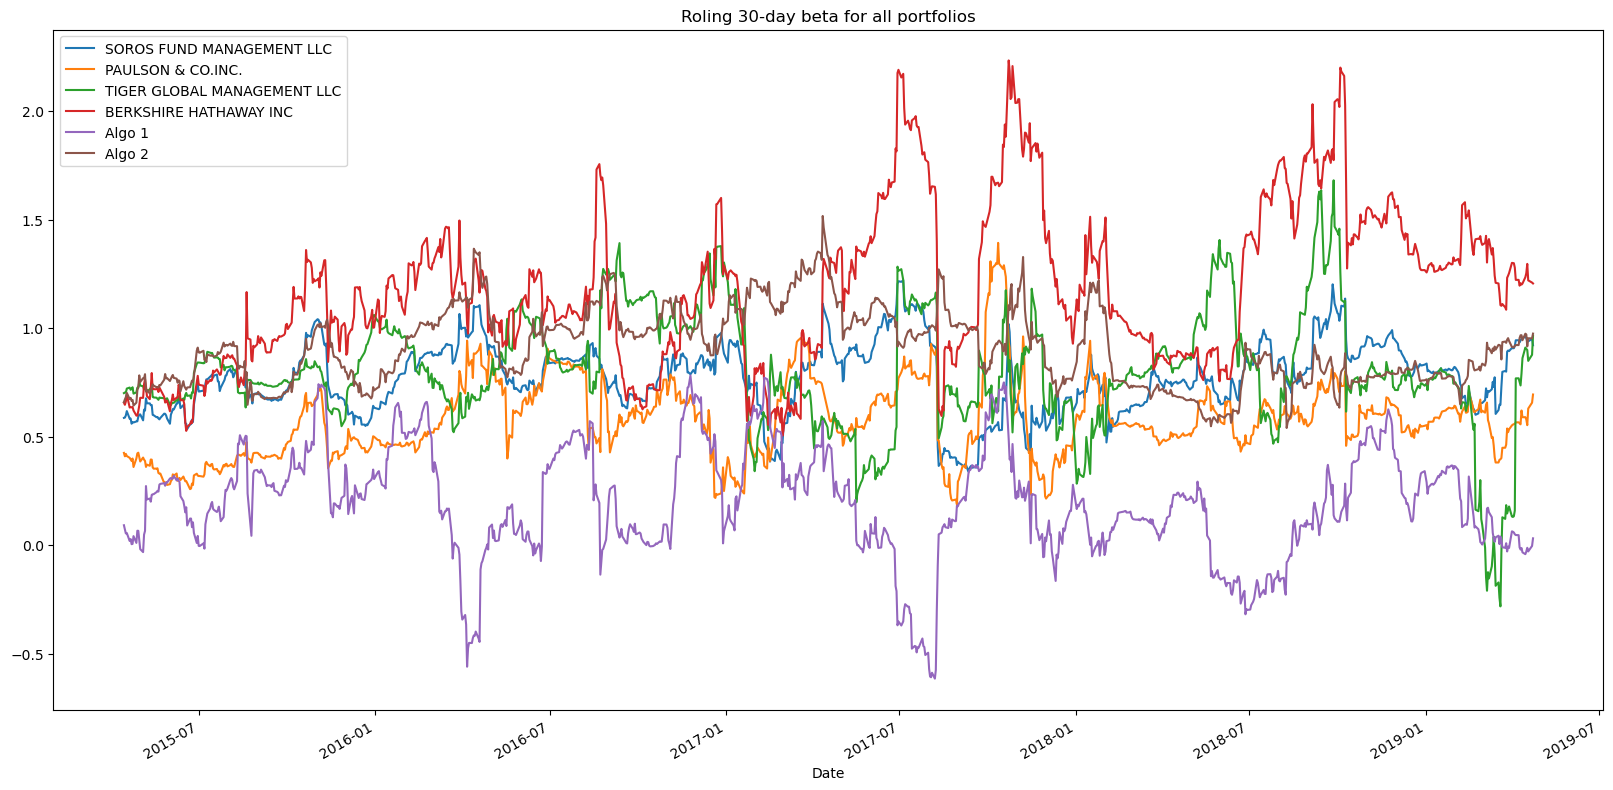

In [23]:
# Calculate covariance of a single portfolio
covariance = combined_df.cov()
print("Covariance:")
print(covariance,'\n')

# Calculate variance of S&P 500
variance = combined_df["S&P 500"].var()
print(f"Variance of S&P 500 is {variance}\n")

# Computing beta
for i, v in covariance.items():
    if i != 'S&P 500':
        cov = covariance.loc[i, 'S&P 500']
        beta = round(cov/variance,2)
        print(f"Beta for {i} is {beta}")

# Plot beta trend
rolling_variance = combined_df["S&P 500"].rolling(window=30).var()
print(f"Rolling 30-day variance of S&P 500 is {rolling_variance}\n")
for i, v in combined_df.items():
    if i != 'S&P 500':
        rolling_covariance = combined_df[i].rolling(window=30).cov(combined_df["S&P 500"])
        rolling_beta = rolling_covariance/rolling_variance
        ax = rolling_beta.plot(figsize=(20,10), label=i, title = 'Roling 30-day beta for all portfolios')
        ax.legend()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

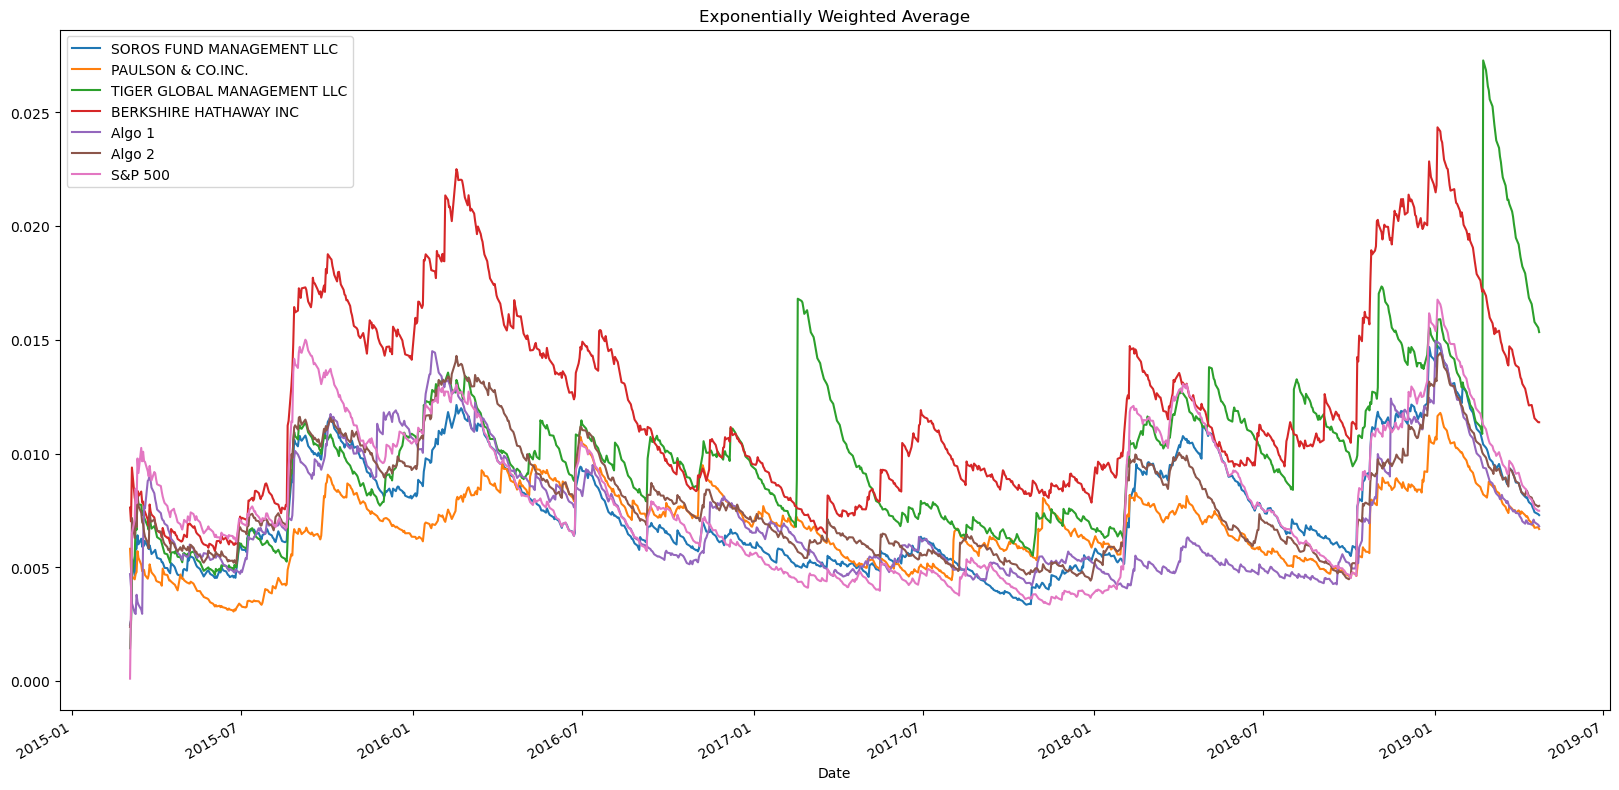

In [47]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(20,10), title='Exponentially Weighted Average')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
print('Sharpe ratios:')
print(sharpe_ratios)

Sharpe ratios:
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratios'}>

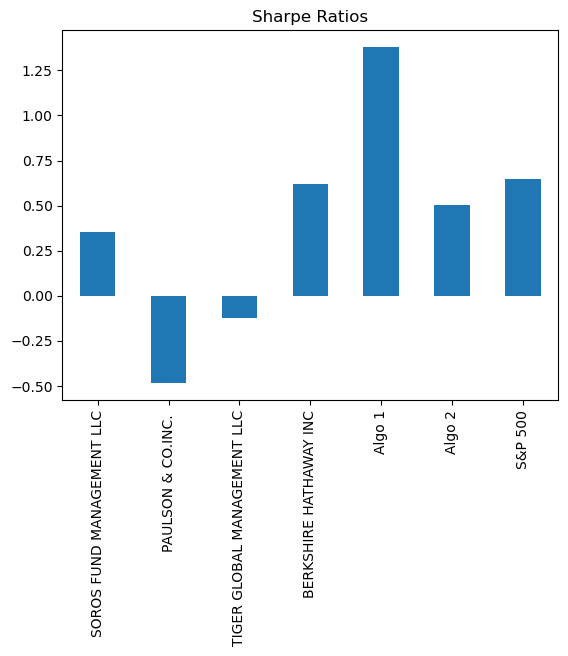

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

<AxesSubplot:title={'center':'Average daily return'}>

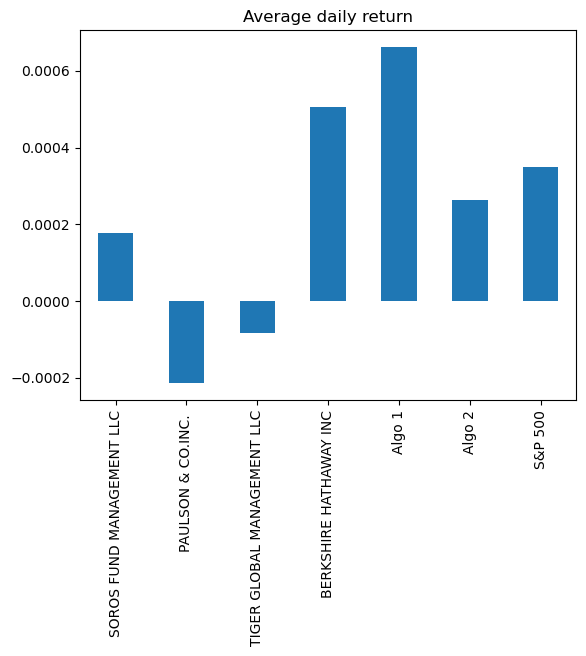

In [27]:
daily_mean = combined_df.mean()
daily_mean.plot(kind='bar', title='Average daily return')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
* Algo 1 has higher average daily return and higher sharpe ratio than S&P 500 and the whales portfolios. Therefore, Algo 1 outperforms both the market and the whales portfolios.
* Based on the same argument, Algo 2 outperforms three whales portfolios: SOROS FUND MANAGEMENT LLC, PAULSON & CO. INC and TIGER GLOBAL MANAGEMENT LLC, but it underperforms BERKSHIRE HATHAWAY INC and S&P 500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
aapl_data = Path("./Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_data, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_df.sort_index(inplace=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [29]:
# Reading data from 2nd stock
cost_data = Path("./Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_data, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_df.sort_index(inplace=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [30]:
# Reading data from 3rd stock
goog_data = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_data, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_df.sort_index(inplace=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [31]:
# Combine all stocks in a single DataFrame
all_prices = pd.concat([aapl_df, cost_df, goog_df], axis='rows', join='inner')
all_prices.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [32]:
# Reset Date index
all_prices.reset_index(inplace=True)

In [33]:
# Reorganize portfolio data by having a column per symbol
all_prices = all_prices.pivot_table(values='NOCP', index='Trade DATE', columns='Symbol')
all_prices.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [34]:
# Calculate daily returns
all_returns=all_prices.pct_change()
all_returns.head()

# Drop NAs
all_returns.dropna(inplace=True)

# Display sample data
all_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = weights[0] * all_returns['AAPL'] + weights[1] * all_returns['COST'] + weights[2] * all_returns['GOOG']

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
daily_returns = pd.concat([combined_df, portfolio_returns], axis='columns', join='inner')
daily_returns.columns = [*daily_returns.columns[:-1], 'My Portfolio']
#daily_returns.rename(columns={"0":"My Portfolio"}, inplace=True)

In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns.dropna(inplace=True)
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
daily_std_all = daily_returns.std()
# print(daily_std_all)
annualized_std_all = daily_std_all * np.sqrt(252)
print("Annualized Standard Deviation:")
annualized_std_all

Annualized Standard Deviation:


SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
My Portfolio                   0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1    Algo 2   S&P 500  My Portfolio
2018-05-14                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN           NaN
2018-05-15                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN           NaN
2018-05-16                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN           NaN
2018-05-17                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN           NaN
2018-05-18                        NaN                 NaN                          NaN                     NaN       NaN       NaN       NaN           NaN
...                               ...                 ...             

<AxesSubplot:title={'center':'Rolling 21-day standard deviation'}>

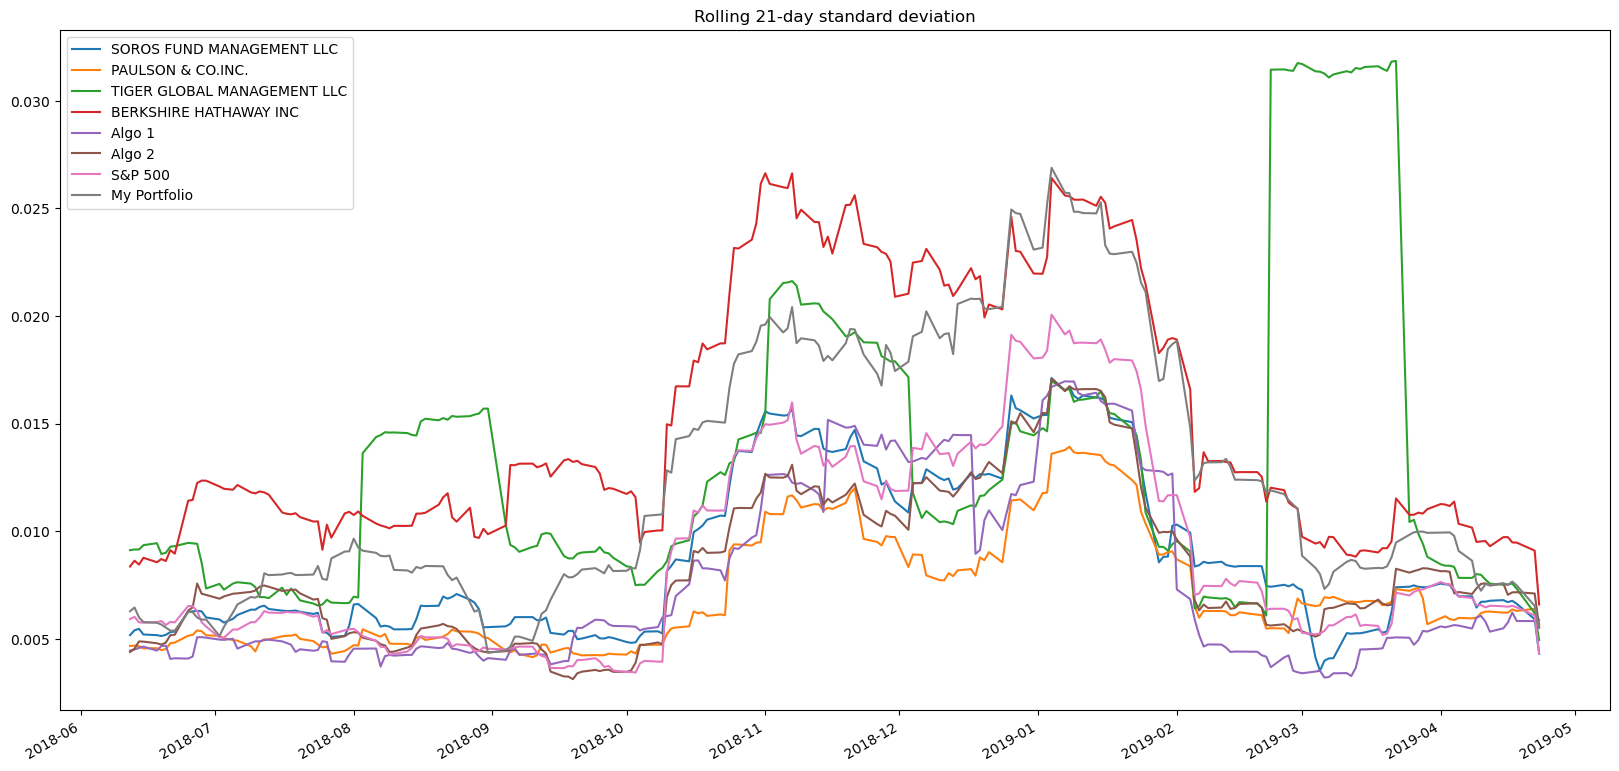

In [39]:
# Calculate rolling standard deviation
rolling_std_21_all = daily_returns.rolling(window=21).std()
print(rolling_std_21_all)

# Plot rolling standard deviation
rolling_std_21_all.plot(figsize=(20,10), title='Rolling 21-day standard deviation')

### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1    Algo 2   S&P 500  My Portfolio
SOROS FUND MANAGEMENT LLC                     1.000000            0.791962                     0.478627                0.816675  0.337826  0.862846  0.876981      0.733250
PAULSON & CO.INC.                             0.791962            1.000000                     0.485375                0.650758  0.361301  0.783656  0.766680      0.644210
TIGER GLOBAL MANAGEMENT LLC                   0.478627            0.485375                     1.000000                0.325457  0.114554  0.409496  0.481030      0.391972
BERKSHIRE HATHAWAY INC                        0.816675            0.650758                     0.325457                1.000000  0.327000  0.782804  0.852303      0.801158
Algo 1                                        0.337826            0.361301                     0.114554                0.327000  1.000000  0

<AxesSubplot:>

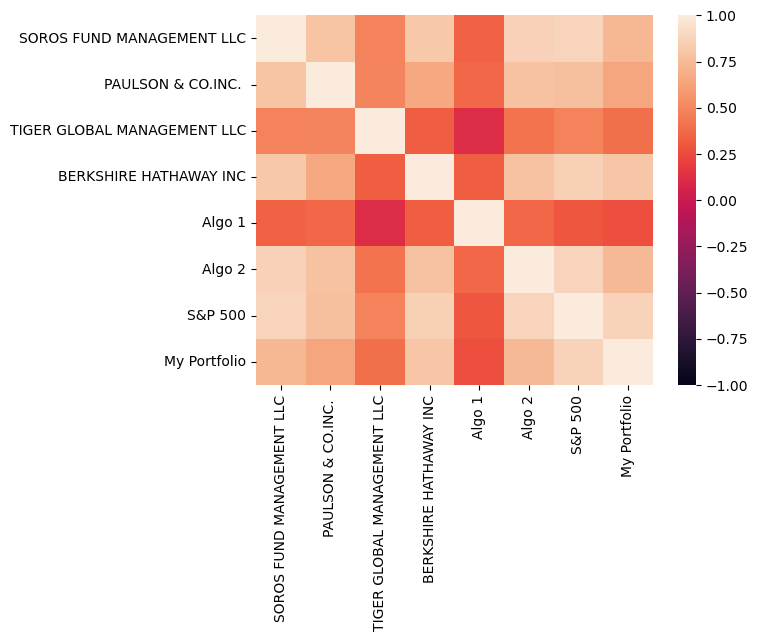

In [40]:
# Calculate and plot the correlation
correlation_all = daily_returns.corr()
print(correlation_all)
sbn.heatmap(correlation_all, vmin = -1, vmax = 1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

Covariance:
                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1    Algo 2   S&P 500  My Portfolio
SOROS FUND MANAGEMENT LLC                     0.000085            0.000054                     0.000065                0.000117  0.000026  0.000070  0.000078      0.000090
PAULSON & CO.INC.                             0.000054            0.000054                     0.000052                0.000075  0.000022  0.000051  0.000054      0.000063
TIGER GLOBAL MANAGEMENT LLC                   0.000065            0.000052                     0.000215                0.000074  0.000014  0.000053  0.000067      0.000076
BERKSHIRE HATHAWAY INC                        0.000117            0.000075                     0.000074                0.000242  0.000043  0.000107  0.000127      0.000166
Algo 1                                        0.000026            0.000022                     0.000014                0.000043 

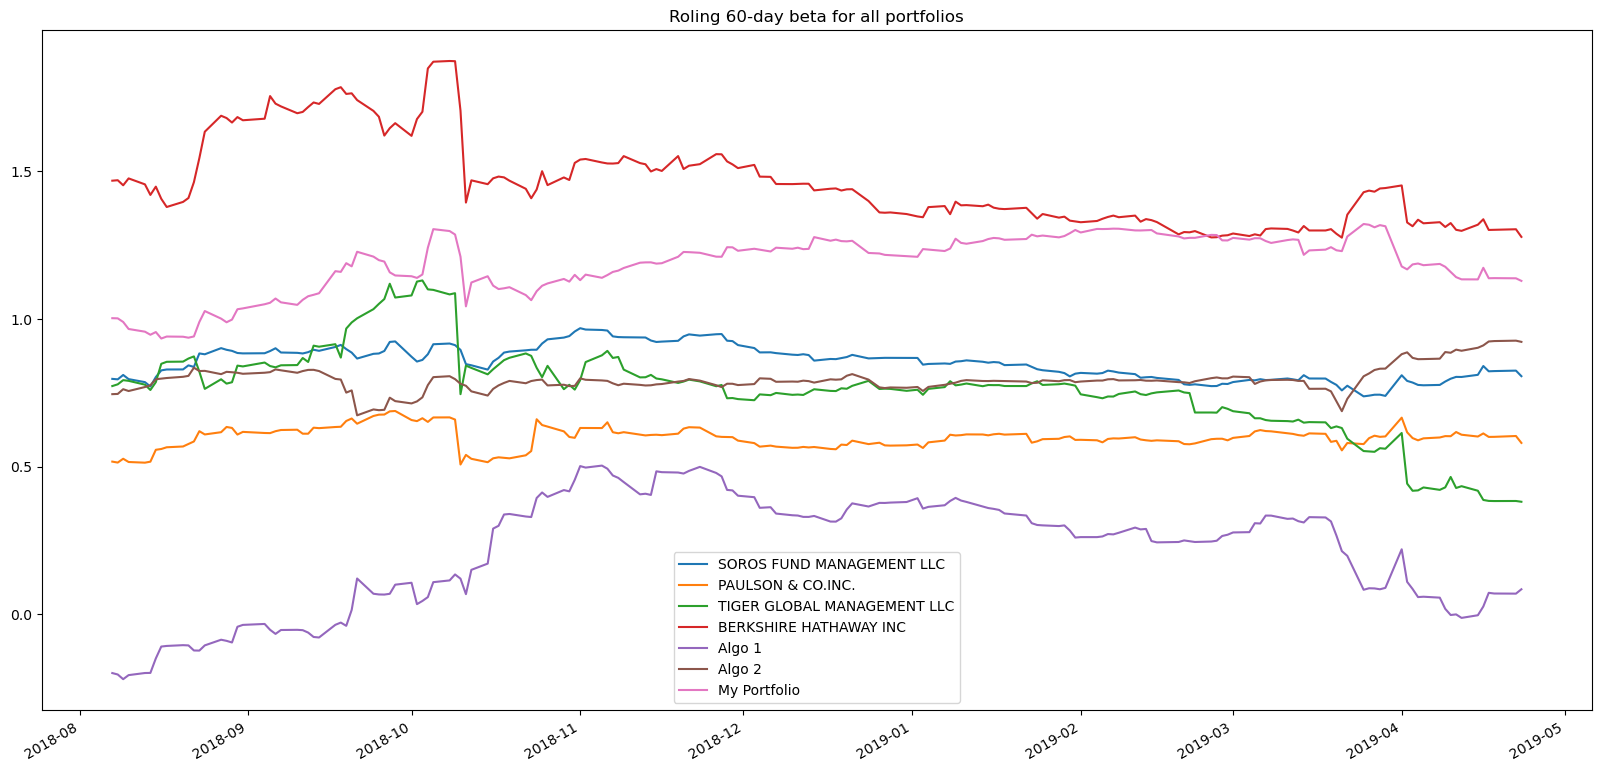

In [41]:
# Calculate and plot Beta
covariance_all = daily_returns.cov()
print("Covariance:")
print(covariance_all,'\n')

# Calculate variance of S&P 500
variance = daily_returns["S&P 500"].var()
print(f"Variance of S&P 500 is {variance}\n")

# Computing beta
for i, v in covariance_all.items():
    if i != 'S&P 500':
        cov = covariance_all.loc[i, 'S&P 500']
        beta = round(cov/variance,2)
        print(f"Beta for {i} is {beta}")

# Plot beta trend
rolling_variance = daily_returns["S&P 500"].rolling(window=60).var()
print(f"Rolling 30-day variance of S&P 500 is {rolling_variance}\n")
for i, v in daily_returns.items():
    if i != 'S&P 500':
        rolling_covariance = daily_returns[i].rolling(window=60).cov(daily_returns["S&P 500"])
        rolling_beta = rolling_covariance/rolling_variance
        ax = rolling_beta.plot(figsize=(20,10), label=i, title = 'Roling 60-day beta for all portfolios')
        ax.legend()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_all = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
print('Sharpe ratios:')
print(sharpe_ratios_all)

Sharpe ratios:
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
My Portfolio                   0.933123
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratios'}>

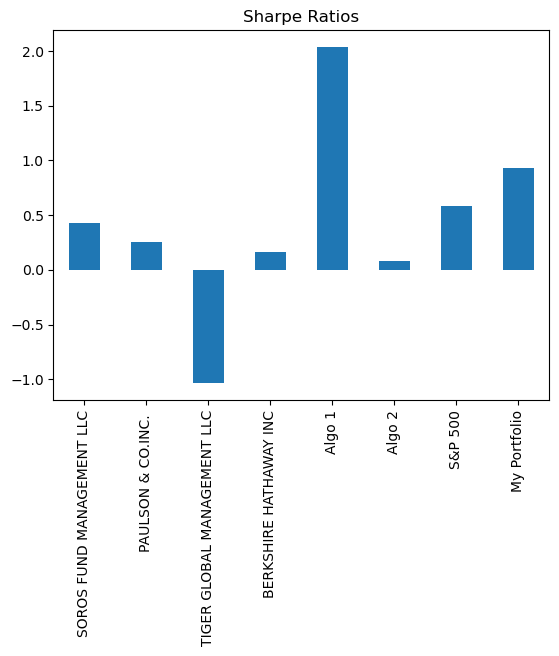

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind='bar', title='Sharpe Ratios')

<AxesSubplot:title={'center':'Average daily return'}>

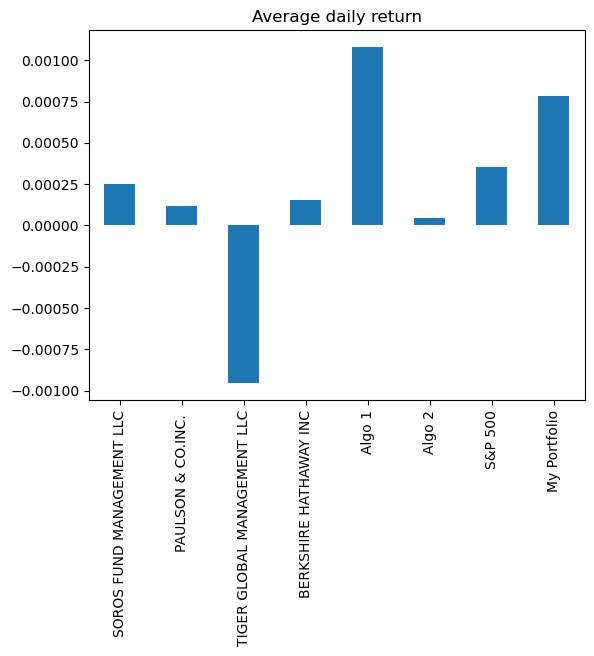

In [44]:
daily_mean_all = daily_returns.mean()
daily_mean_all.plot(kind='bar', title='Average daily return')

### How does your portfolio do?

Write your answer here!

My portfolio has a pretty high beta value so it is quite volatile. It has a high sharpe ratio, only second to Algo 2. Therefore it outperforms most of the other portfolios except Algo 2. It is a pretty good portfolio. 